In [2]:
import numpy as np
from astropy.io import fits
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import random

from scipy.signal import fftconvolve

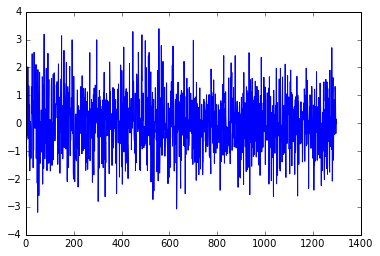

In [3]:
ts1=random.randn(1300)
plt.plot(ts1)

In [4]:
ts1a=ts1[0:1280]
ts1b=ts1[20:1300]

ts1a = np.asarray(ts1a)
ts1b = np.asarray(ts1b)
print len(ts1a)
print len(ts1b)

1280
1280


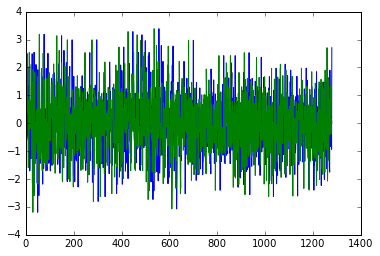

In [5]:
plt.plot(ts1a)
plt.plot(ts1b)

In [6]:
dum0a=fftconvolve(ts1a,ts1a[::-1]) # ACF for ts1a
dum0b=fftconvolve(ts1b,ts1b[::-1]) # ACF for ts1a

dum1=fftconvolve(ts1a,ts1b[::-1]) # cross-correlate

1279
1279


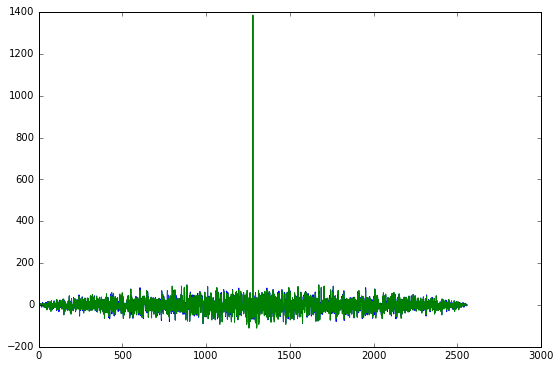

In [7]:
#plot auto correlations
fig,ax=plt.subplots(figsize=[9,6])
ax.plot(dum0a)
ax.plot(dum0b)

# ax.set_xlim(400,1200)
#ax.plot(np.abs(dum1))

print np.argmax(dum0a)
print np.argmax(dum0b)

1299


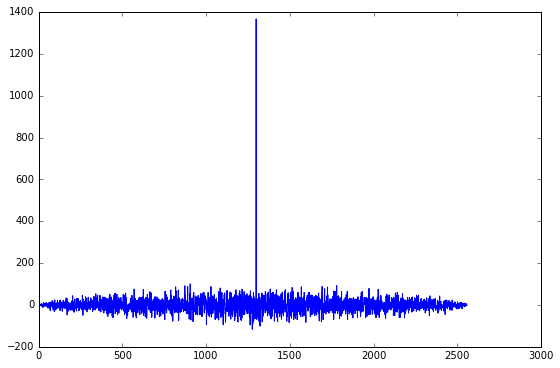

In [8]:
#plot correlation 
fig,ax=plt.subplots(figsize=[9,6])
# ax.set_xlim(400,1200)
ax.plot(dum1)

print np.argmax(dum1)

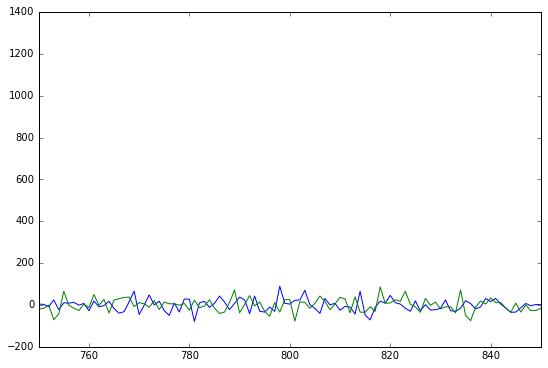

In [9]:
#plot correlation AND one of the autocorrelations
#difference shows the "lag" of 10 points
fig,ax=plt.subplots(figsize=[9,6])
ax.set_xlim(750,850)
ax.plot(dum0a)
ax.plot(dum1)

In [10]:
# now with sine functions

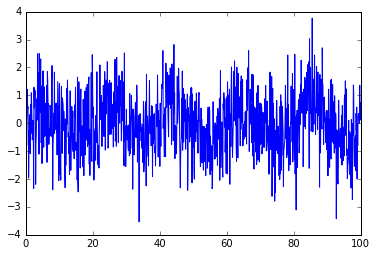

In [11]:
ts2=random.randn(1000)
t=np.arange(len(ts2))/10.
ts2=ts2+0.5*np.sin(2.*np.pi*0.05*t)
plt.plot(t,ts2)

In [12]:
ts2a=ts2[100:900]
ts2b=ts2[110:910]

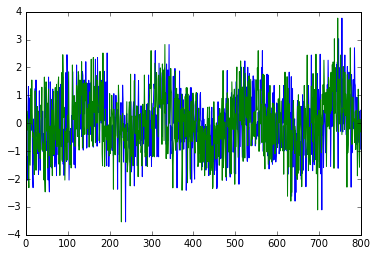

In [13]:
plt.plot(ts2a)
plt.plot(ts2b)

In [14]:
dum0a=fftconvolve(ts2a,ts2a[::-1]) # ACF for ts1a
dum0b=fftconvolve(ts2b,ts2b[::-1]) # ACF for ts1a

dum2=fftconvolve(ts2a,ts2b[::-1]) # cross-correlate

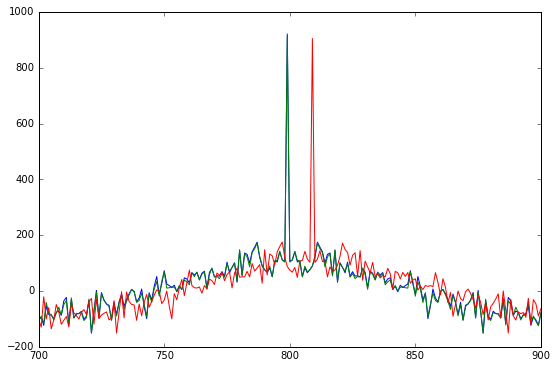

In [15]:
fig,ax=plt.subplots(figsize=[9,6])
ax.set_xlim(700,900)
ax.plot(dum0a)
ax.plot(dum0b)
ax.plot(dum2)

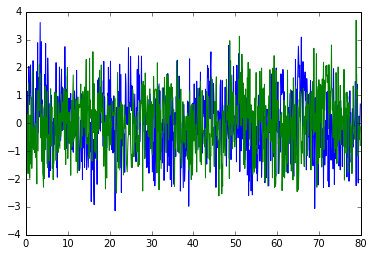

In [16]:
ts3=random.randn(800)
t=np.arange(len(ts3))/10.
ts3a=random.randn(800)+0.5*np.sin(2.*np.pi*0.05*t)+0.3*np.sin(2.*np.pi*0.125*t)
ts3b=random.randn(800)+0.5*np.sin(2.*np.pi*0.05*(t-8.0))
plt.plot(t,ts3a)
plt.plot(t,ts3b)

In [36]:
dum0a=fftconvolve(ts3a,ts3a[::-1]) # ACF for ts1a
dum0b=fftconvolve(ts3b,ts3b[::-1]) # ACF for ts1a

dum3=fftconvolve(ts3a,ts3b[::-1]) # cross-correlate = CCF


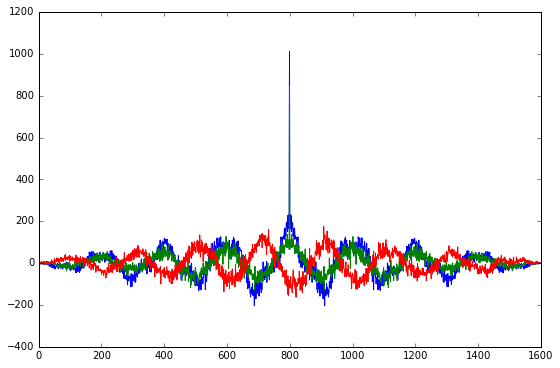

In [37]:
fig,ax=plt.subplots(figsize=[9,6])
#ax.set_xlim(700,900)
ax.plot(dum0a)
ax.plot(dum0b)
ax.plot(dum3)

In [38]:
jnk1=np.fft.fft(ts3a)
jnk2=np.fft.fft(ts3b)

(0.0, 0.8)

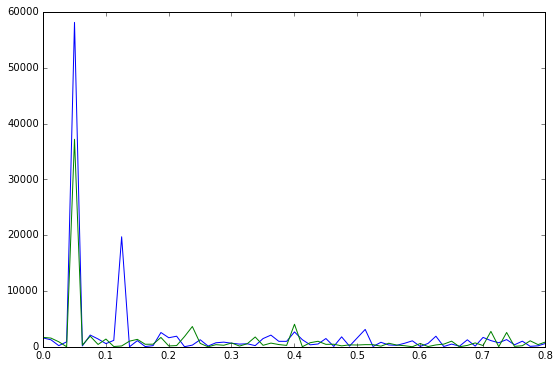

In [39]:
nel2=len(jnk1)/2
f=np.arange(nel2)/np.max(t)

fig,ax=plt.subplots(figsize=[9,6])
ax.plot(f,np.abs(jnk1[:nel2]**2))
ax.plot(f,np.abs(jnk2[:nel2]**2))

ax.set_xlim(0.0,0.8)

(0.0, 0.8)

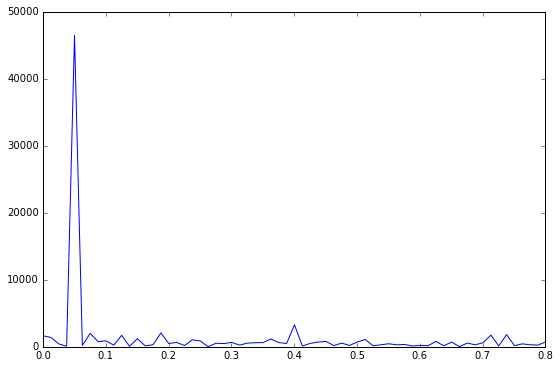

In [40]:
fig,ax=plt.subplots(figsize=[9,6])
ax.plot(f,np.abs(jnk1[:nel2]*np.conj(jnk2[:nel2])))

ax.set_xlim(0.0,0.8)

(0.0, 0.1)

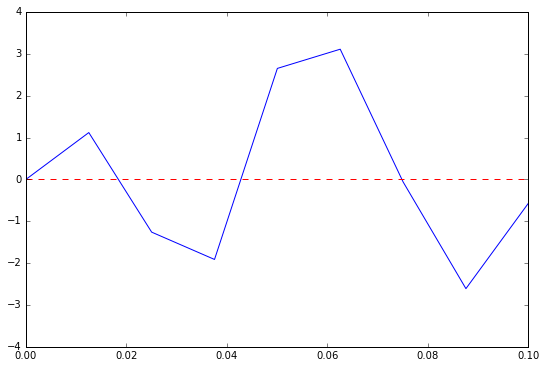

In [41]:
fig,ax=plt.subplots(figsize=[9,6])
ax.plot(f,np.angle(jnk1[:nel2]*np.conj(jnk2[:nel2])))
ax.plot([0.0,np.max(f)],[0.0,0.0],linestyle='--',c='r')
ax.set_xlim(0.0,0.1)